In [150]:
!pip install imbalanced-learn

In [149]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - imbalanced-learn



Note: you may need to restart the kernel to use updated packages.The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.05  |           py39_0           7 KB



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.05=py39_0
  - conda-forge/noarch::imbalanced-learn==0.7.0=py_1
  - defaults/win-64::scikit-learn-intelex==2021.5.0=py39haa95532_0



    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2022.6.15  |       h5b45459_0         188 KB  conda-forge
    certifi-2022.6.15          |   py39hcbf5309_0         155 KB  conda-forge
    openssl-1.1.1p             |       h8ffe710_0         5.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.1 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2022.05-py39_0
  scikit-learn       pkgs/main/win-64::scikit-learn-1.0.2-py39hf11a4ad_1

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2022.3.29-~ --> conda-forge::ca-certificates-2022.6.15-h5b45459_0
  certifi            pkgs/main::certifi-2021.10.8-py39haa9~ --> conda-forge::certifi-2022.6.15-py39hcbf5309_0
  openssl              pkgs/main::openssl-1.1.1n-h2bbff1b_0 --> conda-forge::openssl-1.1.1p-h8ffe710_0

The fol

In [151]:
#impoert libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [152]:
data= pd.read_csv('bank-full (2).csv',encoding='latin1',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


###  About the Dataset

##### Attribute information For bank dataset

   * Input variables:
   # bank client data:
   * 1 - age (numeric)
   * 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   * 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   * 4 - education (categorical: "unknown","secondary","primary","tertiary")
   * 5 - default: has credit in default? (binary: "yes","no")
   * 6 - balance: average yearly balance, in euros (numeric) 
   * 7 - housing: has housing loan? (binary: "yes","no")
   * 8 - loan: has personal loan? (binary: "yes","no")
   #### related with the last contact of the current campaign:
   * 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  * 10 - day: last contact day of the month (numeric)
  * 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  * 12 - duration: last contact duration, in seconds (numeric)
   #### other attributes:
  * 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means    client was not previously contacted)
  * 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  * 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 #### Output variable (desired target):
  * 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

* 8. Missing Attribute Values: None 

###  Data Exploration
##### A Binary Classification Task as our classes to predict is 'Yes' or 'No' a Binomial Distribution

In [153]:
data.shape 

(45211, 17)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [155]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [156]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [157]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


# Data visualization

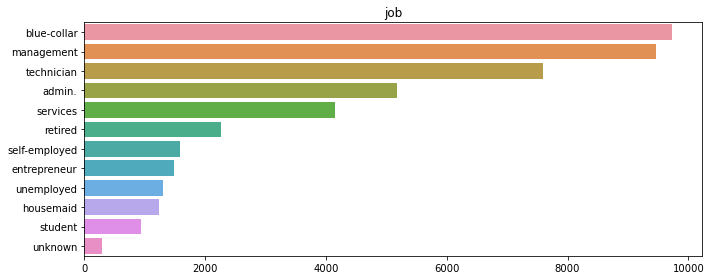

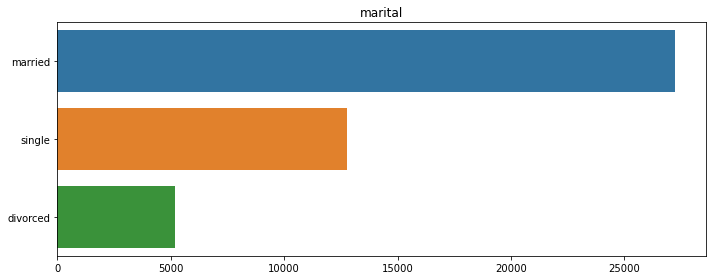

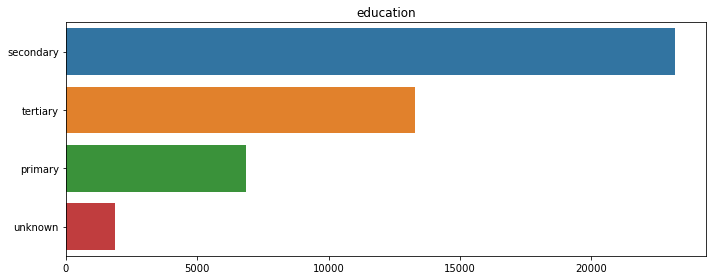

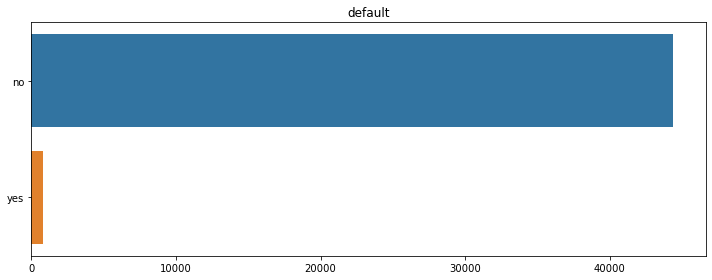

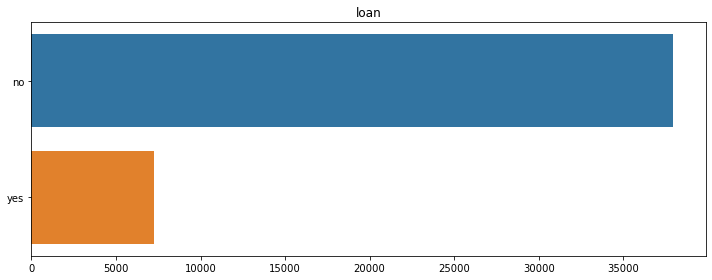

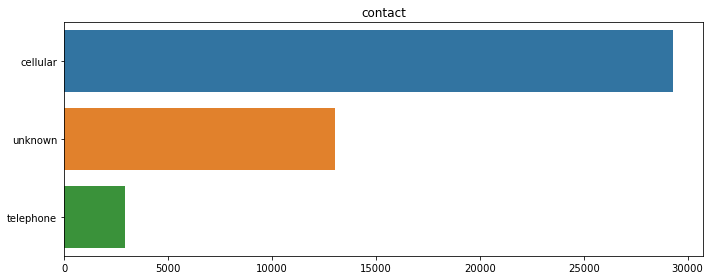

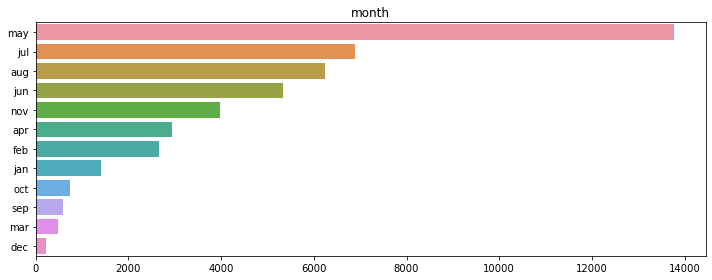

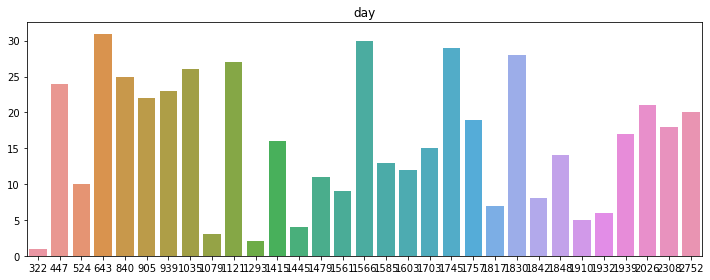

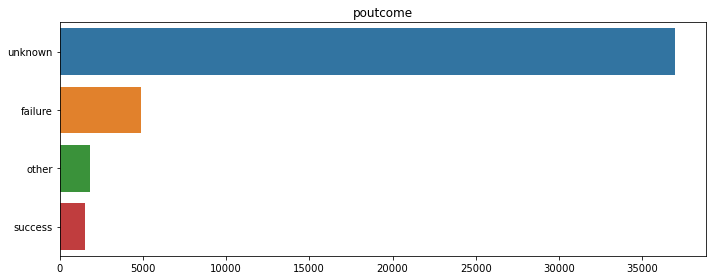

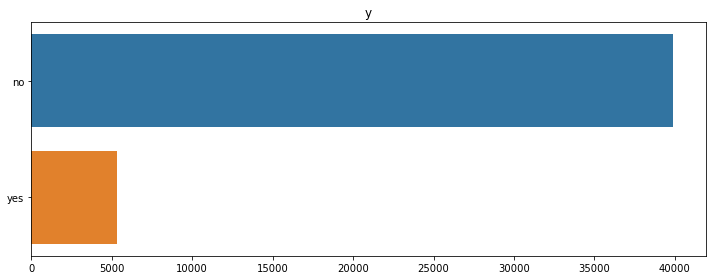

In [158]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

## Correlation Matrix of the numerical features

In [159]:
# Convert target variable into numeric
data.y = data.y.map({'no':0, 'yes':1})

Text(0.5, 1.05, 'Pearson correlation of Features')

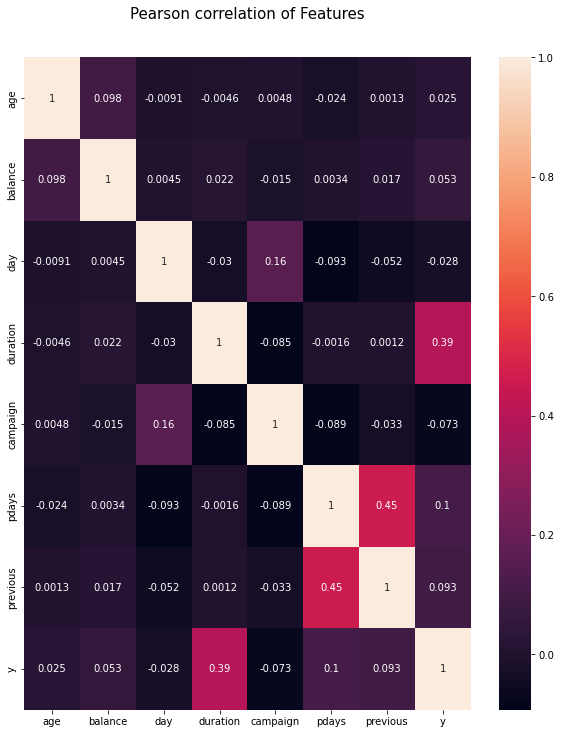

In [160]:
import seaborn as sns
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

sns.heatmap(corr, ax=ax, annot=True)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [161]:
#drop marital and contact columns
data.drop(['marital'],axis=1, inplace=True)
data.drop(['contact'],axis=1, inplace=True)
data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


In [162]:
data[['default','housing','loan']]=data[['default','housing','loan']].replace(["yes","no"],["1","0"])
data['month']=data['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
data['job']=data['job'].replace(['unknown'],['other'])

data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [163]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['education']=le.fit_transform(data['education'])
data['poutcome']=le.fit_transform(data['poutcome'])

In [164]:
data.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


# Outliers

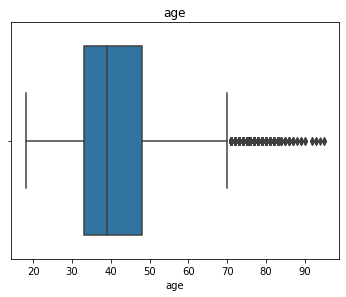

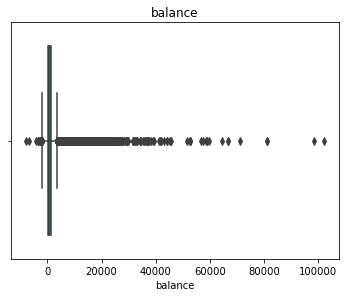

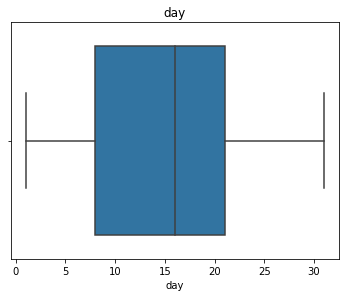

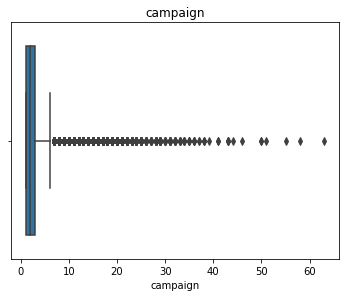

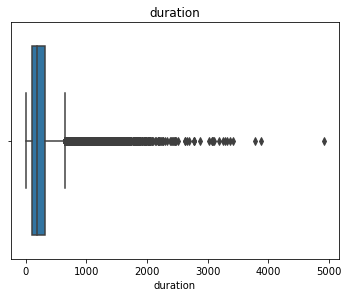

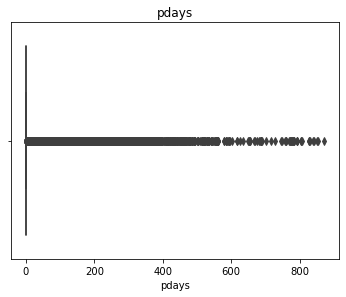

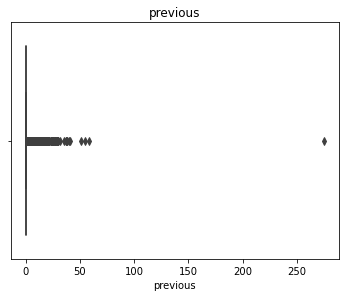

In [165]:
col=data[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(data[i])
  plt.title(i)
  plt.show()
  n=n+1

## Remove outliers using z_score

In [166]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data[['age','balance','duration','campaign','pdays','previous']]))
print(z)
data=data[(z<3).all(axis=1)]
data.shape


            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 15)

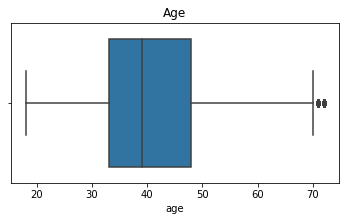

In [167]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data['age'])
plt.title("Age")
plt.show()

### seprating independent and dependent variable

In [168]:
x=data.drop(['y'],axis=1) #contain all  independent variable
y=data['y']           #dependent variable
data['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

### Handling imbalanced data

<AxesSubplot:xlabel='y', ylabel='count'>

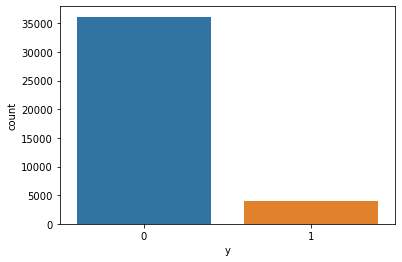

In [169]:
sns.countplot(x='y',data=data)

#### When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

# Random Over-Sampling
#### Oversampling can be defined as adding more copies to the minority class.

In [170]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
x_new,y_new=os.fit_sample(x,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


<AxesSubplot:xlabel='y', ylabel='count'>

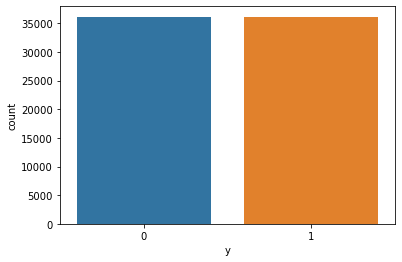

In [171]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

(57848, 14) (14462, 14) (57848,) (14462,)


# Logistic Regression

ROC_AUC Score: 0.7930410347299267
[[5804 1343]
 [1657 5658]]


<AxesSubplot:>

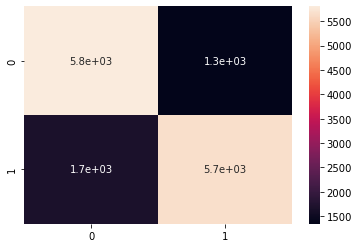

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)

acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [174]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      7461
           1       0.77      0.81      0.79      7001

    accuracy                           0.79     14462
   macro avg       0.79      0.79      0.79     14462
weighted avg       0.79      0.79      0.79     14462



# RandomForest Classifier

ROC_AUC Score: 0.9778547164881108
[[6808  339]
 [   0 7315]]


<AxesSubplot:>

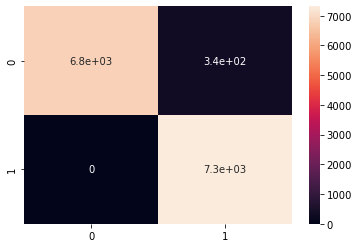

In [175]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)

AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(ytest,y_pred)
print(cm)

sns.heatmap(cm,annot=True)

In [176]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      6808
           1       1.00      0.96      0.98      7654

    accuracy                           0.98     14462
   macro avg       0.98      0.98      0.98     14462
weighted avg       0.98      0.98      0.98     14462



# KNeighbors Classifier

ROC_AUC Score: 0.9342935932576372
[[6130   53]
 [1017 7262]]


<AxesSubplot:>

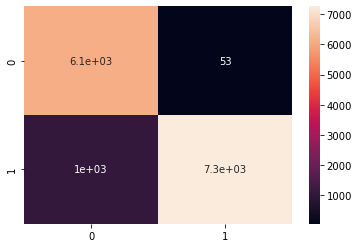

In [177]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
y_predict = knn.predict(xtest)

acc_knn=accuracy_score(ytest,y_predict)
recall_knn=recall_score(ytest,y_predict)
precision_knn=precision_score(ytest,y_predict)
f1score_knn=f1_score(ytest,y_predict)

AUC_KN=roc_auc_score(y_predict,ytest)
print("ROC_AUC Score:",AUC_KN)
cm=confusion_matrix(y_predict,ytest)
print(cm)

sns.heatmap(cm,annot=True)

In [178]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6183
           1       0.99      0.88      0.93      8279

    accuracy                           0.93     14462
   macro avg       0.93      0.93      0.93     14462
weighted avg       0.94      0.93      0.93     14462



## Best model

In [179]:
ind=['Logistic regression','Randomforest','KNeighbors']
data={"Accuracy":[acc_lr,acc_rf,acc_knn],"Recall":[recall_lr,recall_rf,recall_knn],"Precision":[precision_lr,precision_rf,precision_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.792560,0.773479,0.808170,0.790444,0.793041
Randomforest,0.976559,1.000000,0.955709,0.977353,0.977855
KNeighbors,0.926013,0.992755,0.877159,0.931384,0.934294
